In [5]:
import os

# Aktuelles Arbeitsverzeichnis ermitteln
aktuelles_verzeichnis = os.getcwd()

print("Aktuelles Arbeitsverzeichnis:", aktuelles_verzeichnis)


Aktuelles Arbeitsverzeichnis: /Users/sharidelmasry/Desktop/use case


In [6]:

neues_verzeichnis = "/Users/sharidelmasry/Desktop/use case"

# Das Arbeitsverzeichnis ändern
os.chdir(neues_verzeichnis)

# Aktuelles Arbeitsverzeichnis ermitteln
aktuelles_verzeichnis = os.getcwd()

print("Neues Arbeitsverzeichnis:", aktuelles_verzeichnis)

Neues Arbeitsverzeichnis: /Users/sharidelmasry/Desktop/use case


In [7]:
import pandas as pd
import numpy as np

# Anzahl der Datensätze
n_samples = 300

# Generiere zufällige Daten
np.random.seed(0)

# Altersdaten: Angenommen, das Alter reicht von 20 bis 70 Jahre
alter = np.random.randint(20, 71, size=n_samples)

# Risikobereitschaft: Jüngere haben tendenziell eine höhere Risikobereitschaft
# Berechnung der Risikobereitschaft mit einer linearen Beziehung, umgekehrt proportional zum Alter
max_risiko = 5
risikobereitschaft = max_risiko - (alter - 20) / (70 - 20) * (max_risiko - 1)

# Hinzufügen einer zufälligen Varianz von ±20% zur Risikobereitschaft
varianz_risiko = np.random.uniform(-0.2, 0.2, size=n_samples)
risikobereitschaft += risikobereitschaft * varianz_risiko
risikobereitschaft = np.clip(risikobereitschaft, 1, max_risiko)
risikobereitschaft = np.round(risikobereitschaft).astype(int)

# Investitionsvolumen: Ältere haben tendenziell ein höheres Investitionsvolumen
# Berechnung des Investitionsvolumens mit einer linearen Beziehung, proportional zum Alter
investitionsvolumen = 1000 + (alter - 20) / (70 - 20) * (100000 - 1000)

# Hinzufügen einer zufälligen Varianz von ±20% zum Investitionsvolumen
varianz_investition = np.random.uniform(-0.2, 0.2, size=n_samples)
investitionsvolumen += investitionsvolumen * varianz_investition
investitionsvolumen = np.round(investitionsvolumen).astype(int)
investitionsvolumen = np.clip(investitionsvolumen, 0, None)

# Erstellen des DataFrame
df = pd.DataFrame({
    'Alter': alter,
    'Risikobereitschaft': risikobereitschaft,
    'Investitionsvolumen': investitionsvolumen
})

# Anzeigen der ersten Zeilen des DataFrame
df.head()


,Alter,Risikobereitschaft,Investitionsvolumen
0,64,2,73049
1,67,1,75974
2,20,5,1192
3,23,4,5964
4,23,4,6270


In [202]:
from sklearn.preprocessing import StandardScaler
# StandardScaler initialisieren
scaler = StandardScaler()

# Alle Daten im DataFrame standardisieren
scaler.fit(df)
df_scaled = scaler.transform(df)

In [203]:
# Anwenden von K-Means Clustering
from sklearn.cluster import KMeans


In [204]:
cluster_scores = []
for i in range(1,11):
    model = KMeans(n_clusters=i,n_init=10, random_state=42)
    model.fit(df_scaled)
    cluster_scores.append(model.score(df_scaled))
cluster_scores

[-900.0,
 -243.16975641889212,
 -123.29463074266917,
 -86.53213873893094,
 -67.70565664809251,
 -55.40233021617739,
 -44.579750485881576,
 -36.248759730879854,
 -30.52897628769405,
 -26.181756805262992]

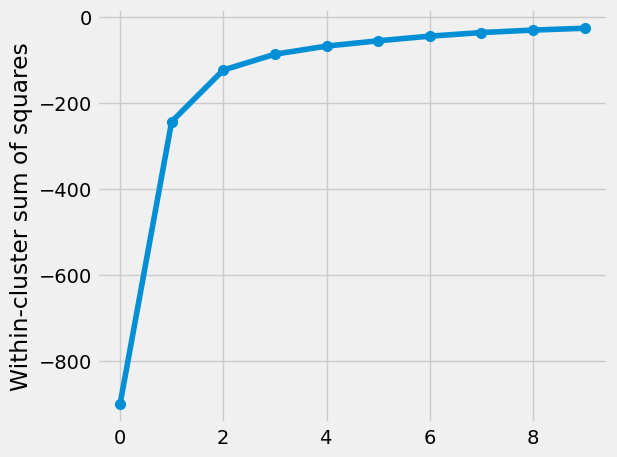

In [205]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(range(10), cluster_scores, marker='o', markersize=7)
ax.set_ylabel('Within-cluster sum of squares')
plt.tight_layout()

/Users/sharidelmasry/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


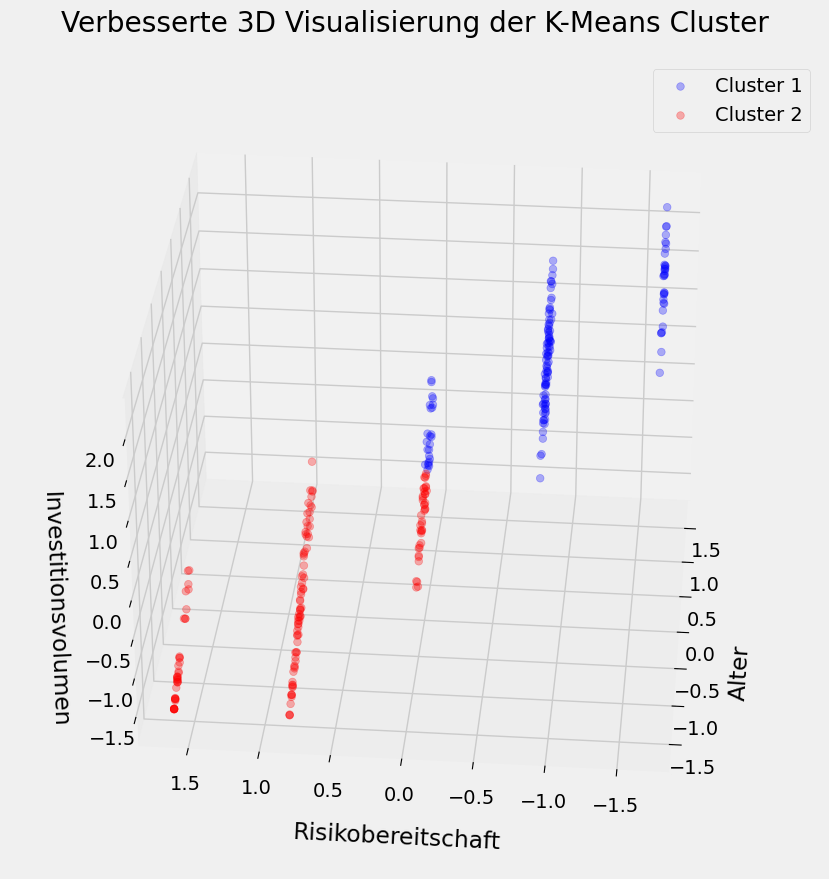

In [206]:
# Umwandeln des Arrays in einen DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Alter', 'Risikobereitschaft', 'Investitionsvolumen'])

km = KMeans(n_clusters=2)
clusters = km.fit_predict(df_scaled)
df_scaled["label"] = clusters
cluster_centers = km.cluster_centers_

# 3D-Visualisierung der Cluster mit erhöhter Transparenz und kleineren Punkten
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Erweiterte Farbpalette, erhöhte Transparenz und kleinere Punkte
colors = ['blue', 'red']
for i in range(2):
    ax.scatter(df_scaled[df_scaled.label == i]['Alter'], 
               df_scaled[df_scaled.label == i]['Risikobereitschaft'], 
               df_scaled[df_scaled.label == i]['Investitionsvolumen'], 
               c=colors[i], s=30, alpha=0.3, label=f'Cluster {i+1}')  # Reduzierte Punktgröße und erhöhte Transparenz



# Anpassung der Achsenbeschriftungen und Titel
ax.set_xlabel("Alter", labelpad=15)
ax.set_ylabel("Risikobereitschaft", labelpad=15)
ax.set_zlabel('Investitionsvolumen', labelpad=15)
ax.set_title("Verbesserte 3D Visualisierung der K-Means Cluster", pad=20)

ax.view_init(30, 185)
ax.legend()
plt.show()


/Users/sharidelmasry/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


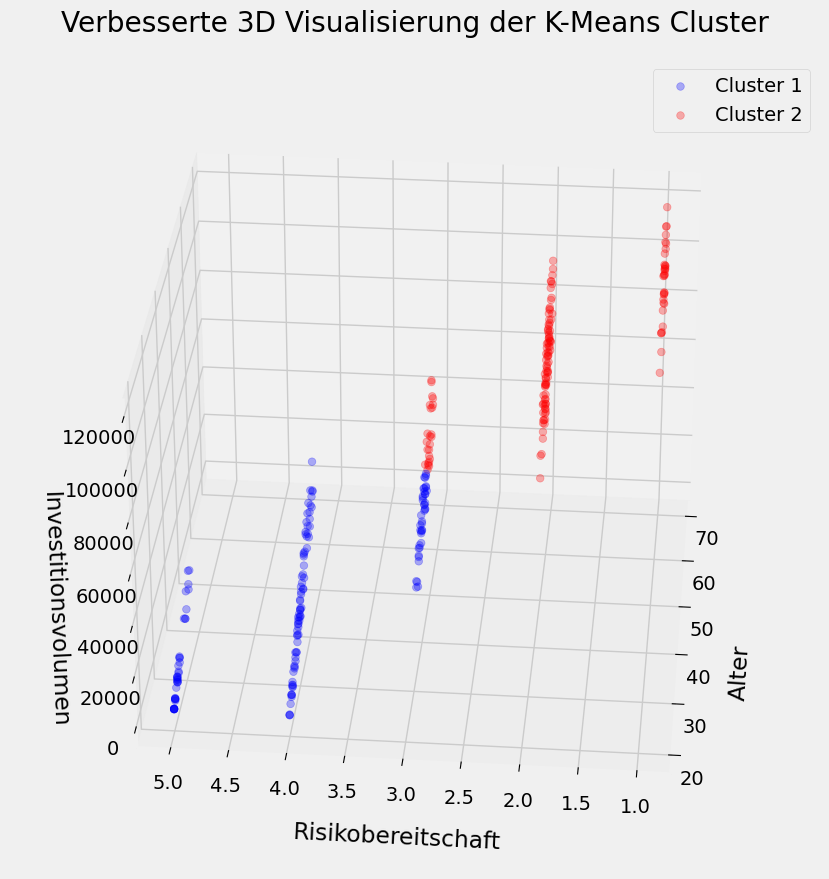

In [207]:

km = KMeans(n_clusters=2)
clusters = km.fit_predict(df_scaled)
df["label"] = clusters
cluster_centers = km.cluster_centers_

# 3D-Visualisierung der Cluster mit erhöhter Transparenz und kleineren Punkten
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Erweiterte Farbpalette, erhöhte Transparenz und kleinere Punkte
colors = ['blue', 'red']
for i in range(2):
    ax.scatter(df[df.label == i]['Alter'], 
               df[df.label == i]['Risikobereitschaft'], 
               df[df.label == i]['Investitionsvolumen'], 
               c=colors[i], s=30, alpha=0.3, label=f'Cluster {i+1}')  # Reduzierte Punktgröße und erhöhte Transparenz



# Anpassung der Achsenbeschriftungen und Titel
ax.set_xlabel("Alter", labelpad=15)
ax.set_ylabel("Risikobereitschaft", labelpad=15)
ax.set_zlabel('Investitionsvolumen', labelpad=15)
ax.set_title("Verbesserte 3D Visualisierung der K-Means Cluster", pad=20)

ax.view_init(30, 185)
ax.legend()
plt.show()
